Dataset contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect

# US Police- Hands Up

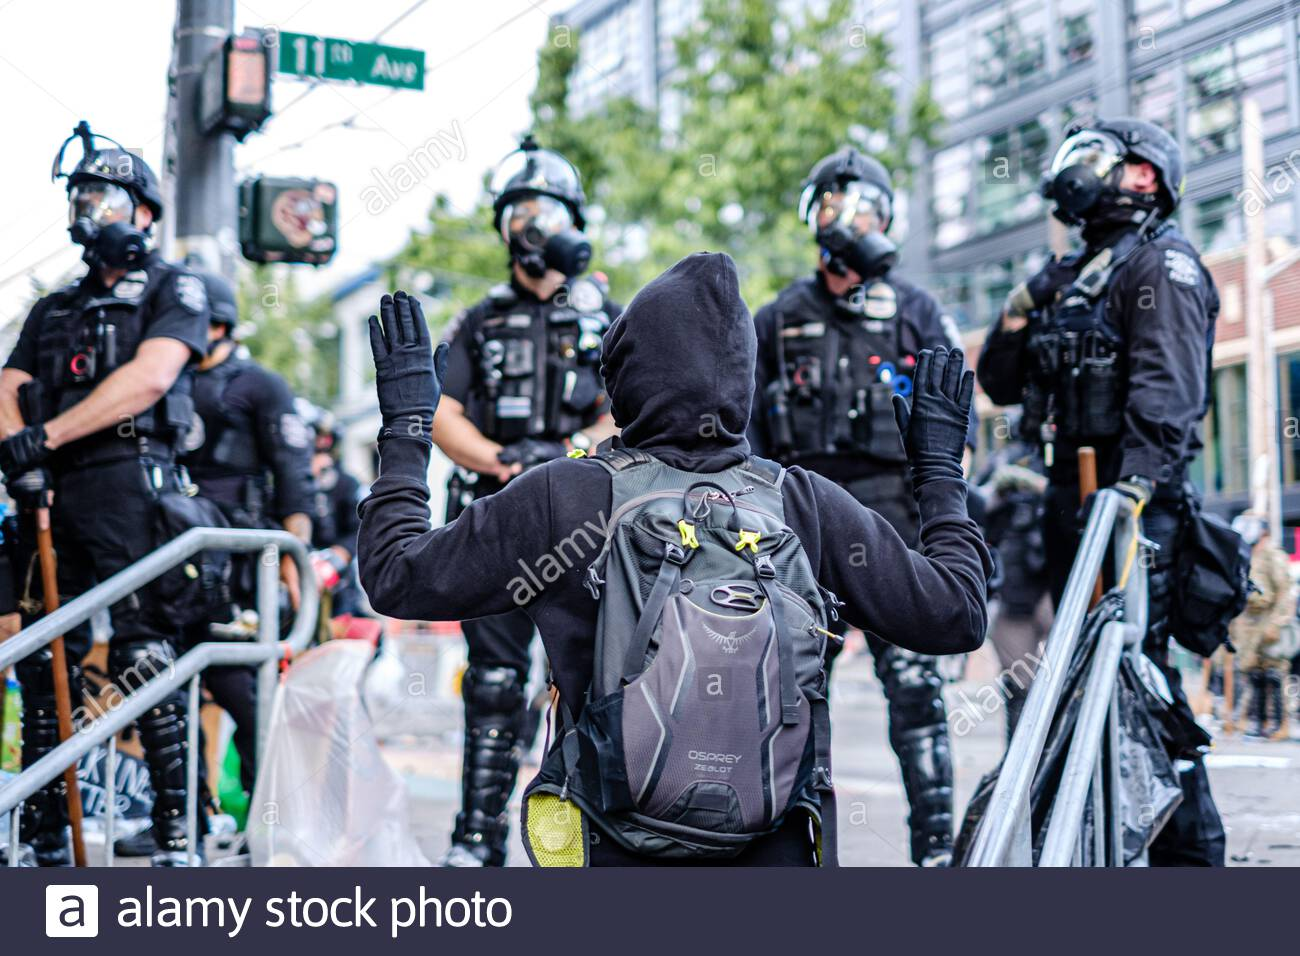

# Table of content



1. Data reading 

2. Univariate Analysis

    1.Distplot    
    2.Barplot
    3.Wordvec
    4.Treeplot
    5.Pie chart
    
    
3. Bivariate Analysis

    1.chi square test

In [ ]:
#basic libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
print(os.listdir('../input/'))


In [ ]:
data = pd.read_csv('../input/us-police-shootings/shootings.csv')

data.head()


In [ ]:
desc = ff.create_table(data.describe())
py.iplot(desc)

Majority of datatype is object

In [ ]:
# checking if there is any NULL data

data.isnull().any().any()

In [ ]:

plt.rcParams['figure.figsize']= (15,7)

plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(data['age'], color='red')
plt.title('Distribution of age', fontsize=20)
plt.xlabel('range of age')
plt.ylabel('count')


plt.subplot(1,2,2)
labels = ['Male', 'Female']
size = data['gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.2]


plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Here in the above plots we can see the distribution of age,

By looking at graph we can infer most of people who invole in shooting is in range between 28-32
Also older and younger is least involve in shooting.

Majority of people who involve in shooting belongs to Male Category.

In [ ]:
size = data['manner_of_death'].value_counts()
labels=['Shot', 'Shot and Tasered']
colors= ['blue', 'orange']
explode = [0, 0.2]

plt.rcParams['figure.figsize']= (9,9)
plt.pie(size, colors= colors, explode=explode, labels=labels, shadow=True, autopct = '%.2f%%')
plt.title('Manner_of_death')
plt.axis('off')
plt.legend()
plt.show()

94.93 percentage of people get shot by us police and only 5.07% people get

In [ ]:
y = data['armed'].value_counts().head(25)

plt.rcParams['figure.figsize']= (20,10)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0,1,15))
squarify.plot(sizes= y.values, label=y.index, alpha=0.8, color=color)
plt.title('Tree Map for what kind of Weapons People has while shootout')

plt.axis('off')
plt.show()

Most of the time people has gun and knife while they involve in shooting.

Some are unarmed too lets findout the reason behind their death.



In [ ]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1000).generate(str(data['armed'].value_counts().head(25)))
plt.title(' Weapons used by Person', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:

size = data['race'].value_counts()
labels = data['race'].value_counts().index
explode = [0.1, 0.1, 0.1, 0.8, 0.6,0.4]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('which race affected the most',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

plt.subplot(1,2,1)
plt.style.use('fast')
data['signs_of_mental_illness'].value_counts(normalize=True).plot.bar( )

plt.title('is there any Mental_illness in People')



plt.subplot(1,2,2)

plt.style.use('fast')

data['body_camera'].value_counts(normalize=True).plot.bar()
plt.title('Are they trying to hide something')

plt.show()

around 78% people won't have any mental illness.

around 90% time police does not have their body_camera ON which rises many question against them.

In [ ]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.magma(np.linspace(0, 1, 15))
data['city'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Regions Where shootouts occurs',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [ ]:

plt.rcParams['figure.figsize']= (15,7)

plt.subplot(1,2,1)
size = data['threat_level'].value_counts()
labels = data['threat_level'].value_counts().index
explode = [0.1, 0.1, 0.1]

plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('Are they attacking',fontsize = 20)
plt.legend()



plt.subplot(1,2,2)
size = data['flee'].value_counts()
labels = data['flee'].value_counts().index
explode = [0.1, 0.1, 0.1, 0.4]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('Are they try to Flee from Police',fontsize = 20)

plt.legend()
plt.show()


# WHAT ABOUT UNARMED PEOPLE?

In [ ]:
plt.rcParams['figure.figsize'] = (20,6)

plt.subplot(1,3,1)

plt.style.use('fast')

size = data[data['armed']=='unarmed'].race.value_counts()
labels = data[data['armed']=='unarmed'].race.value_counts().index
explode = [0.1, 0.1, 0.1, 0.6, 0.6, 0.6]

plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('is there any race is targeted',fontsize = 20)
plt.legend()



plt.subplot(1,3,2)

plt.style.use('fast')

size = data[data['armed']=='unarmed'].threat_level.value_counts()
labels = data[data['armed']=='unarmed'].threat_level.value_counts().index
explode = [0.1, 0.1, 0.1]

plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('Are Unarmed People trying to attack',fontsize = 20)
plt.legend()




plt.subplot(1,3,3)

plt.style.use('fast')

data[data['armed']=='unarmed'].signs_of_mental_illness.value_counts(normalize=True).plot.bar()
plt.title('do they have any mental_illness')

plt.show()




In [ ]:
plt.rcParams['figure.figsize'] = (20,6)

plt.subplot(1,2,1)

plt.style.use('fast')

size = data[data['armed']=='unarmed'].flee.value_counts()
labels = data[data['armed']=='unarmed'].flee.value_counts().index
explode = [0.1, 0.1, 0.1, 0.4]

plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('Are they trying to flee',fontsize = 20)
plt.legend()



plt.subplot(1,2,2)

plt.style.use('fast')

data[data['armed']=='unarmed'].body_camera.value_counts(normalize=True).plot.bar()
plt.title('do they have any mental_illness')

plt.show()

# Statistical hypothesis

Null hypothesis: Manner of death is not depends on body_camera 

Alternate hypothesis : Manner_of_death depends on body_camera

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [ ]:
table = pd.crosstab(data.manner_of_death, data.body_camera)
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Body_camera does not have any effect on Manner_of_death.

Null hypothesis : Manner_of_death  does not depends on people fleeing 

Alternate hypothesis :  Manner_of_death  does depends on people fleeing 

In [ ]:
table2 = pd.crosstab(data.manner_of_death, data.flee)
stat, p, dof, expected = chi2_contingency(table)

alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

In [ ]:
Manner_of_death does depend on fleeing we failed to reject null hypothesis

In [ ]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')